<a href="https://colab.research.google.com/github/bleums/Data-Science-IA/blob/main/Inmersion_Datos_Aula_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

In [8]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [9]:
inmuebles = pd.read_csv('/content/drive/MyDrive/Inmersion_datos/inmuebles_bogota.csv')

In [10]:
columnas = {'Baños':'Banios', 'Área':'Area'}
inmuebles = inmuebles.rename(columns=columnas)

Para cada barrio, cuál es el valor del metro cuadrado

In [11]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banios        9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


In [12]:
type(inmuebles.Valor[0])

str

In [13]:
inmuebles.sample(5)

,Tipo,Descripcion,Habitaciones,Banios,Area,Barrio,UPZ,Valor
8025,Apartamento,Apartamento en venta en Las Nieves,1,1,19,Las Nieves,SANTA FE: Las Nieves + Sagrado Corazón,$ 180.000.000
3852,Apartamento,Apartamento en venta en Puente Largo,3,3,94,Puente Largo,La Alhambra,$ 720.000.000
7541,Apartamento,Apartamento en venta en Santa Barbara,4,5,261,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,$ 1.500.000.000
8340,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,63,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 285.000.000
6293,Apartamento,Apartamento en venta en Fontibón,3,2,43,Fontibón,Fontibón,$ 175.000.000


In [14]:
inmuebles.Valor[0]+inmuebles.Valor[1]

'$ 360.000.000$ 670.000.000'

In [15]:
inmuebles.Valor[0].split()

['$', '360.000.000']

Inmuebles.Valor por sí solo es un pandas.Series, entonces lo debemos convertir en un formato de lista. El expand=True lo convierte en un dataFrame

In [16]:
valor = inmuebles.Valor.str.split(expand=True)

In [17]:
inmuebles['Moneda'] = valor[0]
inmuebles['Precio'] = valor[1]
inmuebles.sample(3)

,Tipo,Descripcion,Habitaciones,Banios,Area,Barrio,UPZ,Valor,Moneda,Precio
1380,Apartamento,Apartamento en venta en El Plan,2,2,73,El Plan,El Rincón,$ 500.000.000,$,500.000.000
1444,Apartamento,Apartamento en venta en Cedritos,1,2,75,Cedritos,Usaquén,$ 485.000.000,$,485.000.000
1811,Apartamento,Apartamento en venta en La Calleja,4,4,143,La Calleja,USAQUÉN: Country Club + Santa Bárbara,$ 989.000.000,$,989.000.000


In [18]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banios        9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
 8   Moneda        9520 non-null   object
 9   Precio        9520 non-null   object
dtypes: int64(3), object(7)
memory usage: 743.9+ KB


Hay que eliminar el punto en Precio para poder luego convertirlo en int64

In [19]:
inmuebles['Precio'] = inmuebles['Precio'].str.replace('.','', regex=True)

In [20]:
inmuebles[['Precio','Barrio']]

,Precio,Barrio
0,360000000,Zona Noroccidental
1,670000000,Castilla
2,1120000000,Chico Reservado
3,890000000,Usaquén
4,970000000,Bella Suiza
...,...,...
9515,290000000,Kennedy
9516,670000000,Parque Central Bavaria
9517,900000000,Restrepo
9518,335000000,Engativa


In [21]:
inmuebles['Precio_Millon'] = inmuebles.Precio.astype('float')/1000000
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           9520 non-null   object 
 1   Descripcion    9520 non-null   object 
 2   Habitaciones   9520 non-null   int64  
 3   Banios         9520 non-null   int64  
 4   Area           9520 non-null   int64  
 5   Barrio         9520 non-null   object 
 6   UPZ            9478 non-null   object 
 7   Valor          9520 non-null   object 
 8   Moneda         9520 non-null   object 
 9   Precio         9520 non-null   object 
 10  Precio_Millon  9520 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 818.2+ KB


In [22]:
inmuebles.describe()

,Habitaciones,Banios,Area,Precio_Millon
count,9520.000000,9520.000000,9520.000000,9520.000000
mean,3.072479,2.447899,146.664706,602.062354
std,2.049856,1.255314,1731.379622,704.602062
min,1.000000,0.000000,2.000000,60.000000
25%,2.000000,2.000000,57.000000,250.000000
50%,3.000000,2.000000,80.000000,409.182500
75%,3.000000,3.000000,135.000000,680.000000
max,110.000000,9.000000,166243.000000,16000.000000


In [23]:
pd.set_option('display.precision',2)
pd.set_option('display.float_format',lambda x: '%.2f' % x)
inmuebles.describe()

,Habitaciones,Banios,Area,Precio_Millon
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


In [24]:
inmuebles.loc[inmuebles.Habitaciones == 110]

,Tipo,Descripcion,Habitaciones,Banios,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
897,Casa,Casa en venta en La Uribe,110,2,110,La Uribe,Usaquén,$ 480.000.000,$,480000000,480.00


Encontramos la propiedad que tiene un dato anómalo. Donde hay una casa de 110 metros cuadrados con 110 habitaciones.

In [25]:
inmuebles.loc[inmuebles.Area == 2]

,Tipo,Descripcion,Habitaciones,Banios,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
8401,Apartamento,Apartamento en venta en San Cristobal,3,1,2,San Cristobal,Sosiego,$ 180.000.000,$,180000000,180.00


<Axes: ylabel='Frequency'>

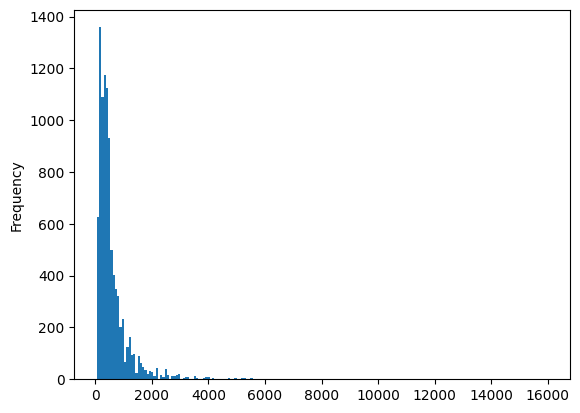

In [26]:
inmuebles['Precio_Millon'].plot.hist(bins=200)

La mayor cantidad de inmuebles se ubican entre 0 y 2000 millones de pesos Colombianos

Usaremos matplotlib y seaborn para graficar

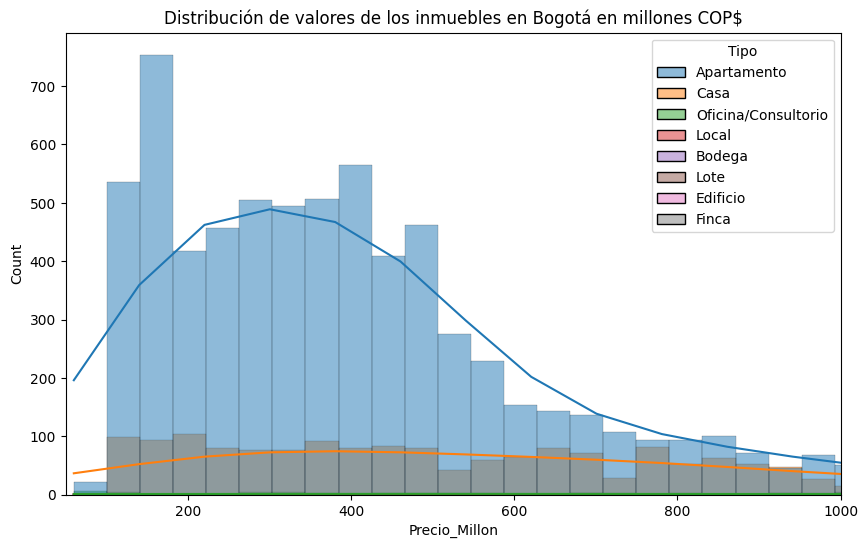

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
grafica = sns.histplot(data=inmuebles, x='Precio_Millon', kde=True, hue='Tipo') #kde: curve of density
grafica.set_title('Distribución de valores de los inmuebles en Bogotá en millones COP$')

plt.xlim((50,1000)) # El límite mínimo y máximo para graficar en la variable X
#plt.ylim((0,20)) # Porque nos queremos enfocar en los otros tipos
plt.savefig('/content/drive/MyDrive/Inmersion_datos/graficos/valor_inmuebles.png',format='png')
plt.show()

Como el 75% de nuestros datos se encuentran entre 60 y 680 millones, cambiamos el xlim

# Desafío

1. Seleccionar y comparar el gráfico del histograma con tres tipos de inmuebles (Refinar el gráfico: Títulos, aumentar el tamaño de los labels)
2. Precio del m2 por barrio y escoger la gráfica que más se adecúe para esta nueva variable.
3. Conclusiones: cómo está el precio de los aptos vs las fincas y casas. Sacar insights

In [28]:
casas = inmuebles.loc[inmuebles.Tipo == 'Casa']

In [29]:
casas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2043 entries, 1 to 9518
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           2043 non-null   object 
 1   Descripcion    2043 non-null   object 
 2   Habitaciones   2043 non-null   int64  
 3   Banios         2043 non-null   int64  
 4   Area           2043 non-null   int64  
 5   Barrio         2043 non-null   object 
 6   UPZ            2034 non-null   object 
 7   Valor          2043 non-null   object 
 8   Moneda         2043 non-null   object 
 9   Precio         2043 non-null   object 
 10  Precio_Millon  2043 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 191.5+ KB


In [30]:
oficinas = inmuebles.loc[inmuebles.Tipo == 'Oficina/Consultorio']
oficinas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 107 to 8767
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           60 non-null     object 
 1   Descripcion    60 non-null     object 
 2   Habitaciones   60 non-null     int64  
 3   Banios         60 non-null     int64  
 4   Area           60 non-null     int64  
 5   Barrio         60 non-null     object 
 6   UPZ            60 non-null     object 
 7   Valor          60 non-null     object 
 8   Moneda         60 non-null     object 
 9   Precio         60 non-null     object 
 10  Precio_Millon  60 non-null     float64
dtypes: float64(1), int64(3), object(7)
memory usage: 5.6+ KB


In [31]:
locales = inmuebles.loc[inmuebles.Tipo == 'Local']
locales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 330 to 9517
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           38 non-null     object 
 1   Descripcion    38 non-null     object 
 2   Habitaciones   38 non-null     int64  
 3   Banios         38 non-null     int64  
 4   Area           38 non-null     int64  
 5   Barrio         38 non-null     object 
 6   UPZ            38 non-null     object 
 7   Valor          38 non-null     object 
 8   Moneda         38 non-null     object 
 9   Precio         38 non-null     object 
 10  Precio_Millon  38 non-null     float64
dtypes: float64(1), int64(3), object(7)
memory usage: 3.6+ KB


In [32]:
fincas = inmuebles.loc[inmuebles.Tipo == 'Finca']
fincas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 1903 to 5521
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           11 non-null     object 
 1   Descripcion    11 non-null     object 
 2   Habitaciones   11 non-null     int64  
 3   Banios         11 non-null     int64  
 4   Area           11 non-null     int64  
 5   Barrio         11 non-null     object 
 6   UPZ            11 non-null     object 
 7   Valor          11 non-null     object 
 8   Moneda         11 non-null     object 
 9   Precio         11 non-null     object 
 10  Precio_Millon  11 non-null     float64
dtypes: float64(1), int64(3), object(7)
memory usage: 1.0+ KB


In [33]:
oficinas_locales_fincas = inmuebles[(inmuebles.Tipo == 'Oficina/Consultorio') | (inmuebles.Tipo == 'Local') | (inmuebles.Tipo == 'Finca')]
oficinas_locales_fincas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 107 to 9517
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           109 non-null    object 
 1   Descripcion    109 non-null    object 
 2   Habitaciones   109 non-null    int64  
 3   Banios         109 non-null    int64  
 4   Area           109 non-null    int64  
 5   Barrio         109 non-null    object 
 6   UPZ            109 non-null    object 
 7   Valor          109 non-null    object 
 8   Moneda         109 non-null    object 
 9   Precio         109 non-null    object 
 10  Precio_Millon  109 non-null    float64
dtypes: float64(1), int64(3), object(7)
memory usage: 10.2+ KB


In [34]:
oficinas_locales_fincas.describe()

,Habitaciones,Banios,Area,Precio_Millon
count,109.00,109.00,109.00,109.00
mean,4.52,3.49,455.85,1386.48
std,4.31,2.75,1207.74,1359.53
min,1.00,1.00,15.00,60.00
25%,1.00,1.00,57.00,470.00
50%,3.00,2.00,162.00,1000.00
75%,6.00,6.00,385.00,1690.00
max,16.00,9.00,8884.00,6720.79


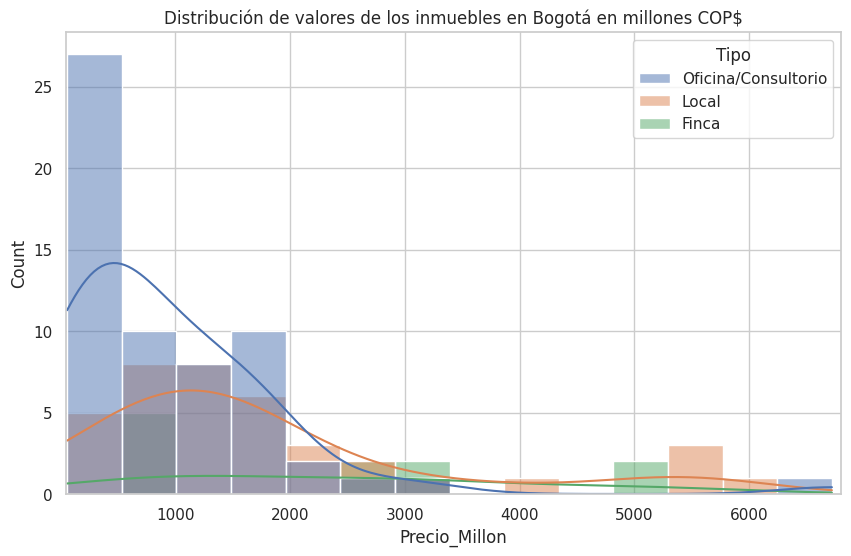

In [54]:
plt.figure(figsize=(10,6))
grafica2 = sns.histplot(data=oficinas_locales_fincas, x='Precio_Millon', kde=True, hue='Tipo') #kde: curve of density
grafica2.set_title('Distribución de valores de los inmuebles en Bogotá en millones COP$')

plt.xlim((50,6800)) # El límite mínimo y máximo para graficar en la variable X
#plt.ylim((0,20)) # Porque nos queremos enfocar en los otros tipos
#plt.savefig('/content/drive/MyDrive/Inmersion_datos/graficos/valor_inmuebles_desafio.png',format='png')
plt.show()

#Insights:
- Es bastante más probable encontrar Oficinas/Consultorios en menos de 5000 millones
- El 75% de todos los inmuebles de tipo Oficina/Consultorio, Local y Finca tienen un precio igual o menor a 1690millones COP$

#2. Precio del metro cuadrado por barrio

In [36]:
inmuebles['Precio_Metro2'] = inmuebles.Precio_Millon.astype('float')/inmuebles.Area
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           9520 non-null   object 
 1   Descripcion    9520 non-null   object 
 2   Habitaciones   9520 non-null   int64  
 3   Banios         9520 non-null   int64  
 4   Area           9520 non-null   int64  
 5   Barrio         9520 non-null   object 
 6   UPZ            9478 non-null   object 
 7   Valor          9520 non-null   object 
 8   Moneda         9520 non-null   object 
 9   Precio         9520 non-null   object 
 10  Precio_Millon  9520 non-null   float64
 11  Precio_Metro2  9520 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 892.6+ KB


In [37]:
inmuebles.sample(5)

,Tipo,Descripcion,Habitaciones,Banios,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon,Precio_Metro2
722,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,72,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 420.000.000,$,420000000,420.00,5.83
8389,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,60,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 250.000.000,$,250000000,250.00,4.17
7211,Apartamento,Apartamento en venta en Zona Noroccidental,2,2,68,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 292.000.000,$,292000000,292.00,4.29
2744,Casa,Casa en venta en Zona Noroccidental,4,4,242,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 1.150.000.000,$,1150000000,1150.00,4.75
8845,Apartamento,Apartamento en venta en Chapinero Central,2,2,68,Chapinero Central,Localidad Chapinero resto,$ 463.000.000,$,463000000,463.00,6.81


<Figure size 8000x8000 with 0 Axes>

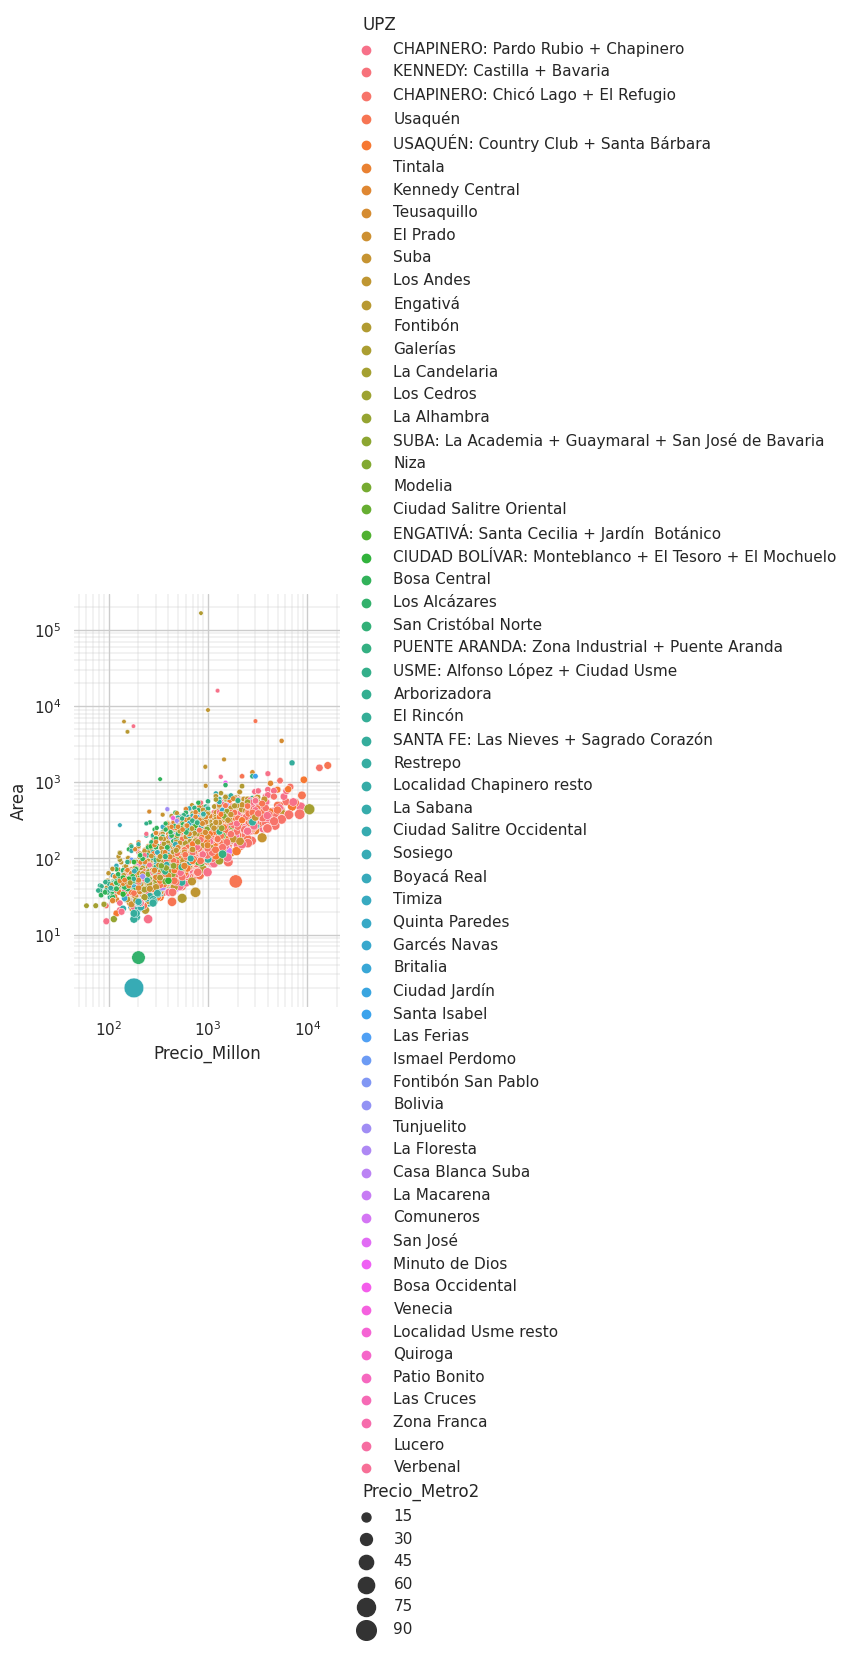

In [60]:
sns.set_theme(style="whitegrid")

# Load the example planets dataset
plt.figure(figsize=(80,80))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=inmuebles,
    x="Precio_Millon", y="Area",
    hue="UPZ", size="Precio_Metro2",
    sizes=(10, 200)
)
#g._legend.remove()
#h,l = g.get_legend_handles_labels()
#g.legend(h[0:3],l[0:3],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=13)
g.set(xscale="log", yscale="log") #xscale="log",
g.ax.yaxis.limit_range_for_scale(0,10000)
g.ax.xaxis.grid(True, "minor", linewidth=.35)
g.ax.yaxis.grid(True, "minor", linewidth=.35)
g.despine(left=True, bottom=True)

Por ser tantos valores, es más útil, en este caso, ver el precio por millón respecto al área del inmueble. Se nota un agrupamiento de colores, que indica que los inmuebles tienden a manejar precios similares dependiendo de la UPZ en la que se encuentren.